# First steps EDA for a given date dataset
###### API"Links":"https://aviationstack.com/documentation
###### "Build"Data"lake"from"scratch":"https://towardsdatascience.com/how-to-build-a-data-lake-from-scratch-part-1-the-setup-34ea1665a06e


In [5]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

import logging
import os
from dotenv import load_dotenv

from utils.extract import *
from utils.processing import *
from utils.create_spark import *

In [6]:
load_dotenv("./properties/.env")

True

In [7]:
logging.basicConfig(filename="./logs/logs.log", format="%(name)s - %(levelname)s - %(asctime)s - %(message)s", level=logging.INFO)

In [8]:
PARAMS = {
    "access_key" : str(os.environ["API_KEY"])
}

In [9]:
def make_date_now():
    data = extract_data(PARAMS)
    write_data(data, "bronze")

In [10]:
make_date_now()

In [11]:
spark = get_spark_object()

your 131072x1 screen size is bogus. expect trouble
23/12/21 18:45:00 WARN Utils: Your hostname, MSIpowaaa resolves to a loopback address: 127.0.1.1; using 172.23.182.147 instead (on interface eth0)
23/12/21 18:45:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/21 18:45:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [12]:
schema = schema()
df_raw = read_data(spark, schema, "bronze", "2023-11-27")
df_root = arrange_schema(df_raw)

In [13]:
is_containing_nulls(df_root)

23/12/21 18:45:09 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


True

In [14]:
df_root = handle_nulls(df_root)

In [15]:
is_containing_nulls(df_root)

False

In [16]:
df_root.show(5)

+-------------------+-------------+--------------------+------------------+--------+--------+------------+--------+---------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+--------+--------+------------+--------+---------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------+------------+-------------+-----------+-----------+-----------------------+-----------------------+-----------------------+------------------------+----------------------+----------------------+
|        flight_date|flight_status|         dep_airport|      dep_timezone|dep_iata|dep_icao|dep_terminal|dep_gate|dep_delay|      dep_scheduled|      dep_estimated|         dep_actual|dep_estimated_runway|  dep_actual_runway|      arr_timezone|arr_iata|arr_icao|arr_terminal|arr_gate|arr_delay|      arr_scheduled|      arr_estimated|         arr_actual|arr_estimated_runway|

In [17]:
df_root.printSchema()

root
 |-- flight_date: timestamp (nullable = true)
 |-- flight_status: string (nullable = false)
 |-- dep_airport: string (nullable = false)
 |-- dep_timezone: string (nullable = false)
 |-- dep_iata: string (nullable = false)
 |-- dep_icao: string (nullable = false)
 |-- dep_terminal: string (nullable = false)
 |-- dep_gate: string (nullable = false)
 |-- dep_delay: integer (nullable = true)
 |-- dep_scheduled: timestamp (nullable = true)
 |-- dep_estimated: timestamp (nullable = true)
 |-- dep_actual: timestamp (nullable = true)
 |-- dep_estimated_runway: timestamp (nullable = true)
 |-- dep_actual_runway: timestamp (nullable = true)
 |-- arr_timezone: string (nullable = false)
 |-- arr_iata: string (nullable = false)
 |-- arr_icao: string (nullable = false)
 |-- arr_terminal: string (nullable = false)
 |-- arr_gate: string (nullable = false)
 |-- arr_delay: integer (nullable = true)
 |-- arr_scheduled: timestamp (nullable = true)
 |-- arr_estimated: timestamp (nullable = true)
 |-- 

In [18]:
df_root.select([count(when(col(c).isNull(), c)).alias(c) for c in df_root.columns]).show() 

+-----------+-------------+-----------+------------+--------+--------+------------+--------+---------+-------------+-------------+----------+--------------------+-----------------+------------+--------+--------+------------+--------+---------+-------------+-------------+----------+--------------------+-----------------+------------+------------+------------+-------------+-----------+-----------+-----------------------+-----------------------+-----------------------+------------------------+----------------------+----------------------+
|flight_date|flight_status|dep_airport|dep_timezone|dep_iata|dep_icao|dep_terminal|dep_gate|dep_delay|dep_scheduled|dep_estimated|dep_actual|dep_estimated_runway|dep_actual_runway|arr_timezone|arr_iata|arr_icao|arr_terminal|arr_gate|arr_delay|arr_scheduled|arr_estimated|arr_actual|arr_estimated_runway|arr_actual_runway|airline_name|airline_iata|airline_icao|flight_number|flight_iata|flight_icao|codeshared_airline_name|codeshared_airline_iata|codeshared_a

In [19]:
df_root.count()

100

In [20]:
df_root.select("flight_date").distinct().show()

+-------------------+
|        flight_date|
+-------------------+
|2023-11-28 00:00:00|
|2023-11-29 00:00:00|
+-------------------+



In [21]:
df_root.select("dep_terminal").distinct().show()

+------------+
|dep_terminal|
+------------+
|           3|
|           5|
|           M|
|           D|
|      Uknown|
|           1|
|           I|
|           2|
+------------+



In [22]:
df_root.describe().show()

+-------+-------------+-----------+------------+--------+--------+------------------+------------------+-----------------+-------------------+--------+--------+------------------+-----------------+-----------------+------------+------------+------------+-----------------+-----------+-----------+-----------------------+-----------------------+-----------------------+------------------------+----------------------+----------------------+
|summary|flight_status|dep_airport|dep_timezone|dep_iata|dep_icao|      dep_terminal|          dep_gate|        dep_delay|       arr_timezone|arr_iata|arr_icao|      arr_terminal|         arr_gate|        arr_delay|airline_name|airline_iata|airline_icao|    flight_number|flight_iata|flight_icao|codeshared_airline_name|codeshared_airline_iata|codeshared_airline_icao|codeshared_flight_number|codeshared_flight_iata|codeshared_flight_icao|
+-------+-------------+-----------+------------+--------+--------+------------------+------------------+----------------

In [23]:
df_root.select("dep_delay").describe().show()

+-------+-----------------+
|summary|        dep_delay|
+-------+-----------------+
|  count|              100|
|   mean|             4.85|
| stddev|13.45503172749432|
|    min|                0|
|    max|              115|
+-------+-----------------+



In [24]:
df_root.select("arr_delay").describe().show()

+-------+-----------------+
|summary|        arr_delay|
+-------+-----------------+
|  count|              100|
|   mean|             2.19|
| stddev|5.413591201501059|
|    min|                0|
|    max|               20|
+-------+-----------------+



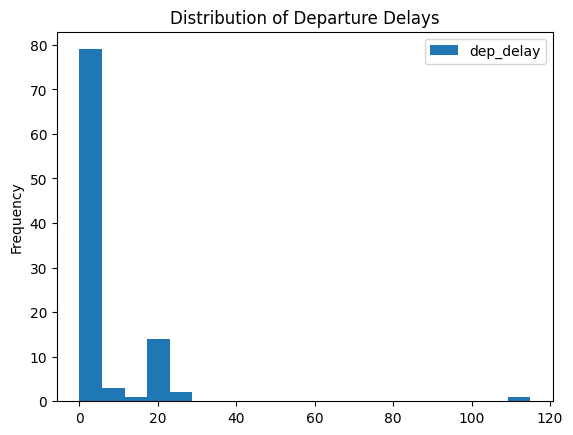

In [25]:
dep_delay_hist = df_root.select("dep_delay").toPandas()
dep_delay_hist.plot(kind="hist", bins=20, title="Distribution of Departure Delays")
plt.show()

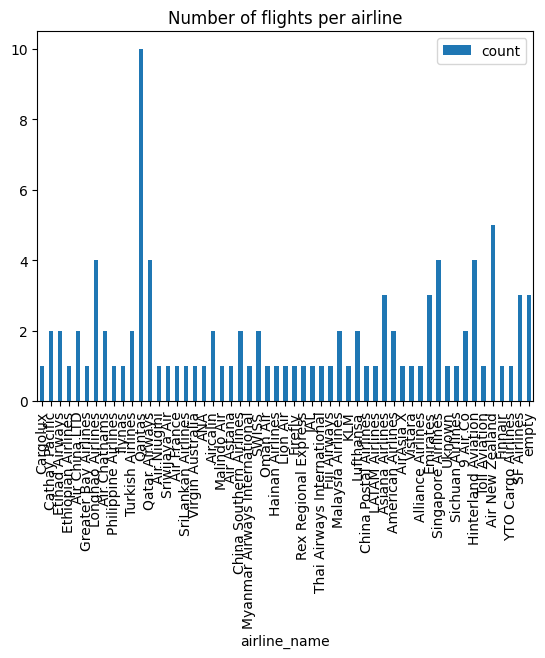

In [26]:
airline_counts = df_root.groupBy("airline_name").count().toPandas()
airline_counts.plot(kind="bar", x="airline_name", y="count", title="Number of flights per airline")
plt.show()

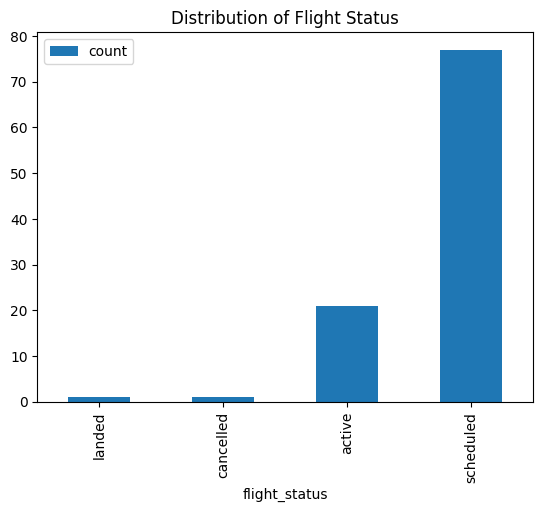

In [27]:
flight_status_counts = df_root.groupBy("flight_status").count().toPandas()
flight_status_counts.plot(kind="bar", x="flight_status", y="count", title="Distribution of Flight Status")
plt.show()

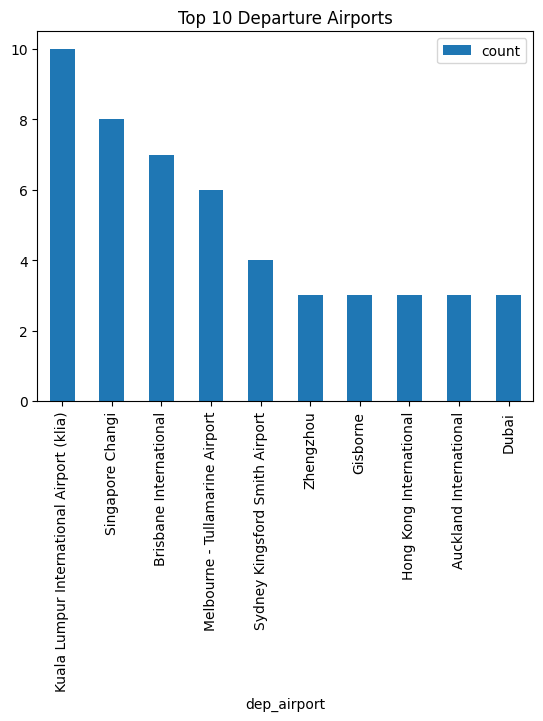

In [28]:
dep_airport_counts = df_root.groupBy("dep_airport").count().toPandas().nlargest(10, "count")
dep_airport_counts.plot(kind="bar", x="dep_airport", y="count", title="Top 10 Departure Airports")
plt.show()

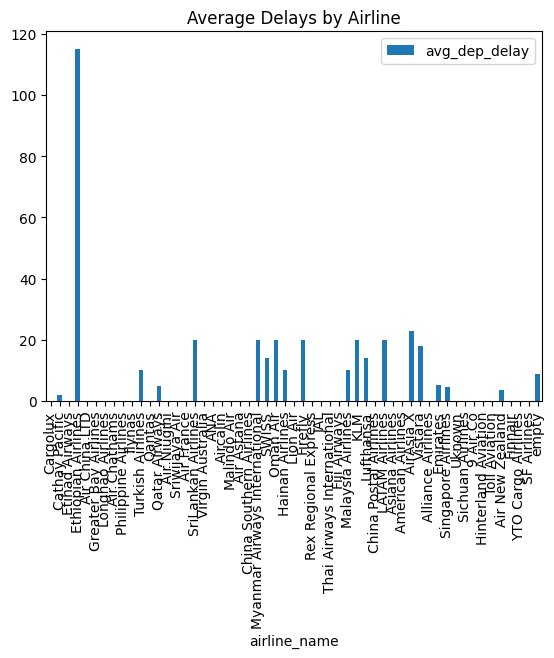

In [29]:
avg_dep_delay_by_airline = df_root.groupBy("airline_name").agg(avg("dep_delay").alias("avg_dep_delay")).toPandas()
avg_dep_delay_by_airline.plot(kind="bar", x="airline_name", y="avg_dep_delay", title="Average Delays by Airline")
plt.show()